# The objective is to classify industrial equipment based on their environmental impact using an unsupervised machine learning approach.
•	It combines three key factors—energy type, equipment category, and estimated lifespan—to calculate an impact score. 

•	Then, it applies a clustering algorithm (K-means,GMM ,DBsacan) to automatically group the equipment into impact levels: low, moderate, or high. The goal is to help companies identify the most polluting equipment and prioritize their actions to reduce their ecological footprint. 

•	The system takes a simple input CSV file and enriches it with impact scores and classifications in the output.


# Data Import

In [6]:
import pandas as pd
fact_df = pd.read_csv(r'C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Fact_Co2_Emissions.csv', delimiter=';')
equipment_df = pd.read_csv(r'C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv', delimiter=';')
energytype_df= pd.read_csv(r'C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Type_Energy.csv')
material_df = pd.read_csv(r'C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Material.csv')
location_df = pd.read_csv(r'C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Location.csv')


In [38]:
pip install reportlab



   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/1.9 MB 2.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.8/1.9 MB 2.2 MB/s eta 0:00:01
   --------------------- ------------------ 1.0/1.9 MB 1.6 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/1.9 MB 1.3 MB/s eta 0:00:01
   -------------------------------- ------- 1.6/1.9 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 1.5 MB/s eta 0:00:00


# Library Imports

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# DataFrame Column Inspection

In [51]:
# 2. First, let's inspect the column names in each DataFrame
print("Fact_CO2_Emissions columns:", fact_df.columns.tolist())
print("Dim_Equipment columns:", equipment_df.columns.tolist())
print("Dim_Type_Energy columns:", energytype_df.columns.tolist())
print("Dim_Material columns:", material_df.columns.tolist())
print("Dim_Location columns:", location_df.columns.tolist())


Fact_CO2_Emissions columns: ['Fk_Date', 'Fk_Equipment', 'Fk_Material', 'Fk_Location', 'Fk_Brand', 'Fk_Supplier', 'Carbon_Foot_Print_per_Unit_kgCo2', 'Transport_Distance_Km', 'Water_Consumption_PerUnit_L', 'CO2_Emissions_kg_equipment', 'Temperature', 'Humidity', 'Wind_Speed', 'CO2_Ambient_Level', 'Energy_Consumption_kWh', 'Renewable_Energy_Percentage']
Dim_Equipment columns: ['Pk_Equipment', 'Equipment_ID', 'Equipment_Name', 'Fk_Mfrequency', 'Fk_MCycle', 'Fk_Category', 'Fk_Energy', 'Manufacturer', 'Estimated_Lifetime_Years']
Dim_Type_Energy columns: ['Pk_energy', 'EnergyCode', 'Energy_Type']
Dim_Material columns: ['Pk_Material', 'MaterialCode', 'Material_name', 'Fk_Type_MM', 'Recycled_Packaging']
Dim_Location columns: ['Pk_Location', 'LocationCode', 'Location']


# Adjusting Merge Keys

In [55]:
# 3. Based on the actual column names, we'll adjust the merge keys
# Let's assume these are the correct column names (replace with actual ones from your output)
equipment_key = 'Equipment_id' if 'Equipment_id' in fact_df.columns else 'equipment_id'
energy_key = 'energy_type_id' if 'energy_type_id' in fact_df.columns else 'EnergyTypeID'
material_key = 'material_id' if 'material_id' in fact_df.columns else 'MaterialID'
location_key = 'location_id' if 'location_id' in fact_df.columns else 'LocationID'


# Function for Displaying Basic Information

In [57]:
# 4. Basic information about each dataframe
def basic_info(df, name):
    print(f"\n=== {name} Basic Information ===")
    print(f"Shape: {df.shape}")
    print("\nFirst 5 rows:")
    display(df.head())
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    display(df.describe(include='all'))

# Apply function to all dataframes
basic_info(fact_df, "Fact_CO2_Emissions")
basic_info(equipment_df, "Dim_Equipment")
basic_info(energytype_df, "Dim_Type_Energy")
basic_info(material_df, "Dim_Material")
basic_info(location_df, "Dim_Location")



=== Fact_CO2_Emissions Basic Information ===
Shape: (6171, 16)

First 5 rows:


,Fk_Date,Fk_Equipment,Fk_Material,Fk_Location,Fk_Brand,Fk_Supplier,Carbon_Foot_Print_per_Unit_kgCo2,Transport_Distance_Km,Water_Consumption_PerUnit_L,CO2_Emissions_kg_equipment,Temperature,Humidity,Wind_Speed,CO2_Ambient_Level,Energy_Consumption_kWh,Renewable_Energy_Percentage
0,401,325,668,2,4,37,383,300,1149,"255,8817",21,98,"12,3","361,66","4407,226","5,31"
1,401,325,668,3,4,37,383,300,1149,"255,8817","28,65",27,12,432220,"4407,226","5,31"
2,401,325,668,4,4,37,383,300,1149,"255,8817","41,6",90,"3,4","468,77","4407,226","5,31"
3,401,325,668,5,4,37,383,300,1149,"255,8817","19,6",41,"0,8","479,47","4407,226","5,31"
4,401,325,1871,2,4,37,383,300,1149,"255,8817",21,98,"12,3","361,66","4407,226","5,31"



Data Types:
Fk_Date                              int64
Fk_Equipment                         int64
Fk_Material                          int64
Fk_Location                          int64
Fk_Brand                             int64
Fk_Supplier                          int64
Carbon_Foot_Print_per_Unit_kgCo2     int64
Transport_Distance_Km                int64
Water_Consumption_PerUnit_L          int64
CO2_Emissions_kg_equipment          object
Temperature                         object
Humidity                             int64
Wind_Speed                          object
CO2_Ambient_Level                   object
Energy_Consumption_kWh              object
Renewable_Energy_Percentage         object
dtype: object

Missing Values:
Fk_Date                             0
Fk_Equipment                        0
Fk_Material                         0
Fk_Location                         0
Fk_Brand                            0
Fk_Supplier                         0
Carbon_Foot_Print_per_Unit_kgCo2    0
Tr

,Fk_Date,Fk_Equipment,Fk_Material,Fk_Location,Fk_Brand,Fk_Supplier,Carbon_Foot_Print_per_Unit_kgCo2,Transport_Distance_Km,Water_Consumption_PerUnit_L,CO2_Emissions_kg_equipment,Temperature,Humidity,Wind_Speed,CO2_Ambient_Level,Energy_Consumption_kWh,Renewable_Energy_Percentage
count,6171.000000,6171.000000,6171.000000,6171.000000,6171.0,6171.000000,6171.000000,6171.000000,6171.000000,6171,6171,6171.000000,6171,6171,6171,6171
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,62,NaN,58,69,31,27
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"888,9882","27,8",NaN,"4,2","399,21","1526,359","10,4"
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,612,391,NaN,510,289,612,1088
mean,581.074380,367.997245,8509.981851,3.542700,4.0,40.236915,809.509642,222.561983,3797.906336,NaN,NaN,57.545455,NaN,NaN,NaN,NaN
std,114.221215,209.881156,4884.048036,1.133224,0.0,24.785902,513.417740,143.370741,2737.030821,NaN,NaN,22.088895,NaN,NaN,NaN,NaN
min,401.000000,24.000000,13.000000,2.000000,4.0,3.000000,128.000000,50.000000,384.000000,NaN,NaN,20.000000,NaN,NaN,NaN,NaN
25%,491.000000,231.000000,4256.500000,2.000000,4.0,21.000000,383.000000,50.000000,1540.000000,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
50%,553.000000,346.000000,8431.000000,4.000000,4.0,32.000000,686.000000,200.000000,2990.000000,NaN,NaN,57.000000,NaN,NaN,NaN,NaN
75%,705.000000,483.000000,12682.000000,5.000000,4.0,68.000000,1310.000000,300.000000,6550.000000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN



=== Dim_Equipment Basic Information ===
Shape: (894, 9)

First 5 rows:


,Pk_Equipment,Equipment_ID,Equipment_Name,Fk_Mfrequency,Fk_MCycle,Fk_Category,Fk_Energy,Manufacturer,Estimated_Lifetime_Years
0,1,E4861,Machine d'Inspection Visuelle,1,1,1,1,AgroTech Inc.,17
1,2,E10000,Cuve de Maturation,1,2,2,1,EvapoTech Co.,12
2,3,E10001,Machine d'Inspection Visuelle,1,1,3,2,PackEquip SARL,12
3,4,E3003,Système de Nettoyage CIP,1,2,1,2,RoboPack Inc.,12
4,5,E7501,Robot de Palettisation,1,3,1,1,CleanTech Solutions,8



Data Types:
Pk_Equipment                 int32
Equipment_ID                object
Equipment_Name              object
Fk_Mfrequency                int64
Fk_MCycle                    int64
Fk_Category                  int64
Fk_Energy                    int64
Manufacturer                object
Estimated_Lifetime_Years     int64
dtype: object

Missing Values:
Pk_Equipment                0
Equipment_ID                0
Equipment_Name              0
Fk_Mfrequency               0
Fk_MCycle                   0
Fk_Category                 0
Fk_Energy                   0
Manufacturer                0
Estimated_Lifetime_Years    0
dtype: int64

Descriptive Statistics:


,Pk_Equipment,Equipment_ID,Equipment_Name,Fk_Mfrequency,Fk_MCycle,Fk_Category,Fk_Energy,Manufacturer,Estimated_Lifetime_Years
count,894.000000,894,894,894.000000,894.000000,894.000000,894.000000,894,894.000000
unique,NaN,894,13,NaN,NaN,NaN,NaN,12,NaN
top,NaN,E4861,Machine d'Inspection Visuelle,NaN,NaN,NaN,NaN,EvapoTech Co.,NaN
freq,NaN,1,233,NaN,NaN,NaN,NaN,250,NaN
mean,447.500000,NaN,NaN,1.805369,2.987696,3.380313,2.238255,NaN,12.252796
std,258.219868,NaN,NaN,0.818415,1.311874,1.420807,1.168000,NaN,4.034686
min,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,5.000000
25%,224.250000,NaN,NaN,1.000000,2.000000,2.000000,1.000000,NaN,9.000000
50%,447.500000,NaN,NaN,2.000000,3.000000,4.000000,2.000000,NaN,12.000000
75%,670.750000,NaN,NaN,3.000000,4.000000,4.000000,3.000000,NaN,16.000000



=== Dim_Type_Energy Basic Information ===
Shape: (5, 3)

First 5 rows:


,Pk_energy,EnergyCode,Energy_Type
0,Pk_energy,EnergyCode,Energy_Type
1,1,EN001,Solaire
2,2,EN002,Fioul
3,3,EN003,Gaz
4,4,EN004,Electricité



Data Types:
Pk_energy      object
EnergyCode     object
Energy_Type    object
dtype: object

Missing Values:
Pk_energy      0
EnergyCode     0
Energy_Type    0
dtype: int64

Descriptive Statistics:


,Pk_energy,EnergyCode,Energy_Type
count,5,5,5
unique,5,5,5
top,Pk_energy,EnergyCode,Energy_Type
freq,1,1,1



=== Dim_Material Basic Information ===
Shape: (13091, 5)

First 5 rows:


,Pk_Material,MaterialCode,Material_name,Fk_Type_MM,Recycled_Packaging
0,Pk_Material,MaterialCode,Material_name,Fk_Type_MM,Recycled_Packaging
1,1,M090,Ferments lactiques,1,Non
2,2,M086,Ferments lactiques,1,Oui
3,3,M102,ConcentrÃ© de fraise,1,Oui
4,4,M011,Ferments lactiques,1,Oui



Data Types:
Pk_Material           object
MaterialCode          object
Material_name         object
Fk_Type_MM            object
Recycled_Packaging    object
dtype: object

Missing Values:
Pk_Material           0
MaterialCode          0
Material_name         0
Fk_Type_MM            0
Recycled_Packaging    0
dtype: int64

Descriptive Statistics:


,Pk_Material,MaterialCode,Material_name,Fk_Type_MM,Recycled_Packaging
count,13091,13091,13091,13091,13091
unique,13091,381,17,4,4
top,Pk_Material,M287,ConcentrÃ© de fraise,1,Non
freq,1,119,2227,6562,6324



=== Dim_Location Basic Information ===
Shape: (6, 3)

First 5 rows:


,Pk_Location,LocationCode,Location
0,Pk_Location,LocationCode,Location
1,1,L001,Nabeul
2,2,L002,Sousse
3,3,L003,Gabès
4,4,L004,Sfax



Data Types:
Pk_Location     object
LocationCode    object
Location        object
dtype: object

Missing Values:
Pk_Location     0
LocationCode    0
Location        0
dtype: int64

Descriptive Statistics:


,Pk_Location,LocationCode,Location
count,6,6,6
unique,6,6,6
top,Pk_Location,LocationCode,Location
freq,1,1,1


# CO2 Emissions Distribution Analysis


=== CO2 Emissions Analysis ===


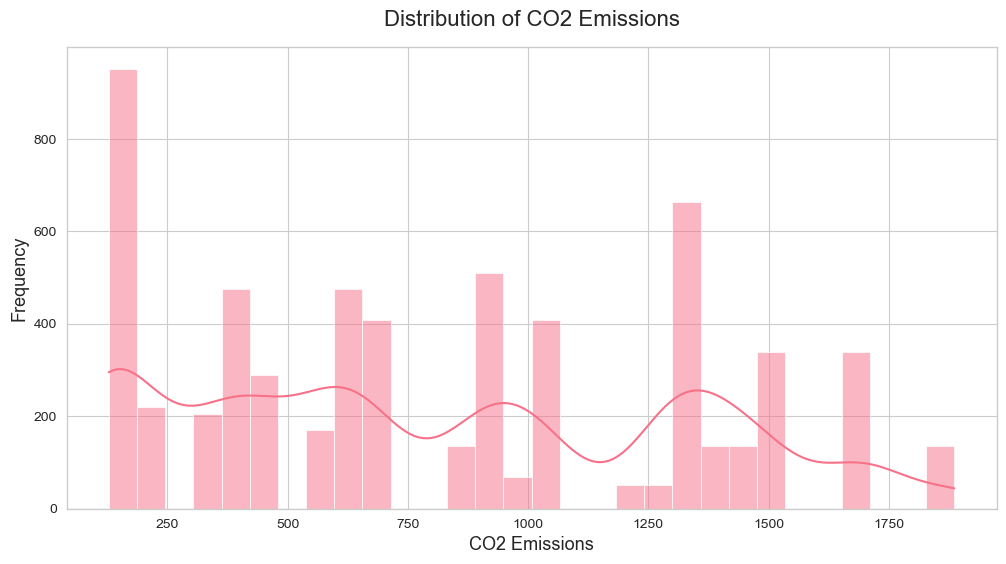

In [61]:
# 6. Analysis of CO2 Emissions
print("\n=== CO2 Emissions Analysis ===")

# Find the actual CO2 emission column name
co2_col = [col for col in merged_df.columns if 'co2' in col.lower() or 'emission' in col.lower()]
if not co2_col:
    co2_col = 'value'  # default guess
else:
    co2_col = co2_col[0]

# Distribution of CO2 emissions
plt.figure(figsize=(12, 6))
sns.histplot(merged_df[co2_col], bins=30, kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()


# I- K-MEANS

# 1- **Summary of Clustering with K-Means:**
•	The script uses the K-Means algorithm to automatically group equipment based on their environmental impact score. 

•	Each piece of equipment is assigned to a cluster (numbered from 0 to K-1) based on the similarity of its impact score.

•	In this case , the value of K is set to 4, meaning that the equipment is divided into 4 distinct groups. This clustering helps better understand impact profiles and identify trends or patterns in the data.



# 2- **Why K-Means:**

1. **Objective:** To group equipment by environmental impact scores for better analysis.
2. **Advantages:** Simple, fast, unsupervised, and scalable for large datasets.
3. **Why K-Means:** It segments equipment into 4 groups (K=4) based on impact scores, helping identify trends for sustainability decisions.

In [81]:
import pandas as pd
import joblib
import numpy as np
from pathlib import Path
import sys
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

class EnvironmentalImpactClassifier:
    def __init__(self, n_clusters=3):  # Ajout du paramètre n_clusters pour K-Means
        # Pondérations radicalement différenciées
        self.energy_weights = {
            '1': 1.0,  # Fioul - impact maximal
            '2': 0.5,  # Gaz
            '3': 0.2,  # Electricité
            '4': 0.1   # Solaire - impact minimal
        }
        
        self.category_weights = {
            '1': 1.0,  # Production
            '2': 0.6,  # Transformation
            '3': 0.4,  # Refrigeration
            '4': 0.3,  # Conditionnement
            '5': 0.2,  # Nettoyage
            '6': 0.1   # Controle Qualite
        }
        
        # Seuils ajustés pour une meilleure répartition
        self.low_threshold = 0.3
        self.medium_threshold = 0.6
        
        # Nombre de clusters pour K-Means
        self.n_clusters = n_clusters
        
    def calculate_score(self, energy, category, lifetime):
        # Formule avec dominance très forte de l'énergie
        energy_w = self.energy_weights.get(energy, 0.5)
        category_w = self.category_weights.get(category, 0.5)
        lifetime_w = min(lifetime / 25, 1)  # Normalisé sur 25 ans
        
        return (energy_w * 0.85 + category_w * 0.10 + lifetime_w * 0.05)

    def predict_level(self, score):
        # Classification stricte
        if score < self.low_threshold:
            return "FAIBLE"
        elif score < self.medium_threshold:
            return "MODÉRÉ"
        else:
            return "ÉLEVÉ"
        
    def apply_kmeans(self, df):
        # Appliquer K-Means sur les scores d'impact
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        df['Cluster'] = kmeans.fit_predict(df[['Impact_Score']])  # Utiliser le score d'impact pour la segmentation
        
        # Ajouter la colonne de clusters à df
        return df

    def process_file(self, input_path, output_path):
        try:
            # Lecture du fichier
            df = pd.read_csv(input_path, delimiter=';')
            print("Colonnes détectées:", df.columns.tolist())
            
            # Vérification des colonnes requises
            required = ['Fk_Energy', 'Fk_Category', 'Estimated_Lifetime_Years', 'Equipment_Name']
            if not all(col in df.columns for col in required):
                missing = [col for col in required if col not in df.columns]
                raise ValueError(f"Colonnes manquantes: {missing}")
            
            # Nettoyage des données
            df = df.dropna(subset=required)
            df['Fk_Energy'] = df['Fk_Energy'].astype(str).str.strip()
            df['Fk_Category'] = df['Fk_Category'].astype(str).str.strip()
            df['Estimated_Lifetime_Years'] = pd.to_numeric(
                df['Estimated_Lifetime_Years'], errors='coerce')
            
            # Calcul des scores
            df['Impact_Score'] = df.apply(
                lambda row: self.calculate_score(
                    row['Fk_Energy'],
                    row['Fk_Category'],
                    row['Estimated_Lifetime_Years']
                ), axis=1
            )
            
            # Classification
            df['Impact_Level'] = df['Impact_Score'].apply(self.predict_level)
            
            # Appliquer K-Means
            df = self.apply_kmeans(df)
            
            # Analyse des scores pour vérification
            print("\nStatistiques des scores:")
            print(df['Impact_Score'].describe())
            
            # Sauvegarde
            output_cols = [
                'Equipment_Name', 'Fk_Energy', 'Fk_Category',
                'Estimated_Lifetime_Years', 'Impact_Score', 'Impact_Level', 'Cluster'
            ]
            
            Path(output_path).parent.mkdir(parents=True, exist_ok=True)
            df[output_cols].to_csv(output_path, index=False, sep=';', encoding='utf-8-sig')
            
            print("\nRépartition des niveaux:")
            print(df['Impact_Level'].value_counts())
            print("\nExemples de classification:")
            print(df[output_cols].head(10))
            
            return df
            
        except Exception as e:
            print(f"ERREUR: {str(e)}", file=sys.stderr)
            return None

def main():
    print("\n=== CLASSIFICATION ENVIRONNEMENTALE FINALE AVEC K-MEANS ===")
    
    input_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv"
    output_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact_with_KMEANS.csv"
    
    classifier = EnvironmentalImpactClassifier(n_clusters=4)  # Choisir le nombre de clusters souhaité
    results = classifier.process_file(input_file, output_file)

if __name__ == "__main__":
    main()



=== CLASSIFICATION ENVIRONNEMENTALE FINALE AVEC K-MEANS ===
Colonnes détectées: ['Pk_Equipment', 'Equipment_ID', 'Equipment_Name', 'Fk_Mfrequency', 'Fk_MCycle', 'Fk_Category', 'Fk_Energy', 'Manufacturer', 'Estimated_Lifetime_Years']

Statistiques des scores:
count    894.000000
mean       0.533683
std        0.321799
min        0.105000
25%        0.216000
50%        0.481000
75%        0.904000
max        0.988000
Name: Impact_Score, dtype: float64

Répartition des niveaux:
Impact_Level
FAIBLE    355
ÉLEVÉ     340
MODÉRÉ    199
Name: count, dtype: int64

Exemples de classification:
                   Equipment_Name Fk_Energy Fk_Category  \
0   Machine d'Inspection Visuelle         1           1   
1              Cuve de Maturation         1           2   
2   Machine d'Inspection Visuelle         2           3   
3        Système de Nettoyage CIP         2           1   
4          Robot de Palettisation         1           1   
5  Machine de Mélange Automatique         3           3


=== CLASSIFICATION ENVIRONNEMENTALE FINALE AVEC K-MEANS ===
Colonnes détectées: ['Pk_Equipment', 'Equipment_ID', 'Equipment_Name', 'Fk_Mfrequency', 'Fk_MCycle', 'Fk_Category', 'Fk_Energy', 'Manufacturer', 'Estimated_Lifetime_Years']

Statistiques des scores:
count    894.000000
mean       0.533683
std        0.321799
min        0.105000
25%        0.216000
50%        0.481000
75%        0.904000
max        0.988000
Name: Impact_Score, dtype: float64

Répartition des niveaux:
Impact_Level
FAIBLE    355
ÉLEVÉ     340
MODÉRÉ    199
Name: count, dtype: int64

Exemples de classification:
                   Equipment_Name Fk_Energy Fk_Category  \
0   Machine d'Inspection Visuelle         1           1   
1              Cuve de Maturation         1           2   
2   Machine d'Inspection Visuelle         2           3   
3        Système de Nettoyage CIP         2           1   
4          Robot de Palettisation         1           1   
5  Machine de Mélange Automatique         3           3

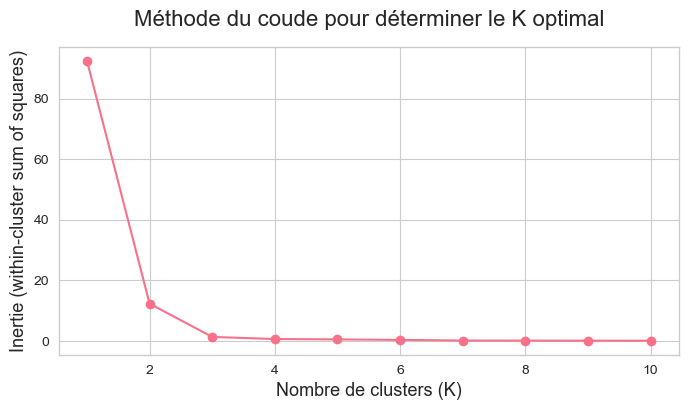

In [83]:
import pandas as pd
import joblib
import numpy as np
from pathlib import Path
import sys
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

class EnvironmentalImpactClassifier:
    def __init__(self, n_clusters=3):  # Ajout du paramètre n_clusters pour K-Means
        # Pondérations radicalement différenciées
        self.energy_weights = {
            '1': 1.0,  # Fioul - impact maximal
            '2': 0.5,  # Gaz
            '3': 0.2,  # Electricité
            '4': 0.1   # Solaire - impact minimal
        }
        
        self.category_weights = {
            '1': 1.0,  # Production
            '2': 0.6,  # Transformation
            '3': 0.4,  # Refrigeration
            '4': 0.3,  # Conditionnement
            '5': 0.2,  # Nettoyage
            '6': 0.1   # Controle Qualite
        }
        
        # Seuils ajustés pour une meilleure répartition
        self.low_threshold = 0.3
        self.medium_threshold = 0.6
        
        # Nombre de clusters pour K-Means
        self.n_clusters = n_clusters
        
    def calculate_score(self, energy, category, lifetime):
        # Formule avec dominance très forte de l'énergie
        energy_w = self.energy_weights.get(energy, 0.5)
        category_w = self.category_weights.get(category, 0.5)
        lifetime_w = min(lifetime / 25, 1)  # Normalisé sur 25 ans
        
        return (energy_w * 0.85 + category_w * 0.10 + lifetime_w * 0.05)

    def predict_level(self, score):
        # Classification stricte
        if score < self.low_threshold:
            return "FAIBLE"
        elif score < self.medium_threshold:
            return "MODÉRÉ"
        else:
            return "ÉLEVÉ"
        
    def apply_kmeans(self, df):
        # Appliquer K-Means sur les scores d'impact
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        df['Cluster'] = kmeans.fit_predict(df[['Impact_Score']])  # Utiliser le score d'impact pour la segmentation
        
        # Ajouter la colonne de clusters à df
        return df

    def process_file(self, input_path, output_path):
        try:
            # Lecture du fichier
            df = pd.read_csv(input_path, delimiter=';')
            print("Colonnes détectées:", df.columns.tolist())
            
            # Vérification des colonnes requises
            required = ['Fk_Energy', 'Fk_Category', 'Estimated_Lifetime_Years', 'Equipment_Name']
            if not all(col in df.columns for col in required):
                missing = [col for col in required if col not in df.columns]
                raise ValueError(f"Colonnes manquantes: {missing}")
            
            # Nettoyage des données
            df = df.dropna(subset=required)
            df['Fk_Energy'] = df['Fk_Energy'].astype(str).str.strip()
            df['Fk_Category'] = df['Fk_Category'].astype(str).str.strip()
            df['Estimated_Lifetime_Years'] = pd.to_numeric(
                df['Estimated_Lifetime_Years'], errors='coerce')
            
            # Calcul des scores
            df['Impact_Score'] = df.apply(
                lambda row: self.calculate_score(
                    row['Fk_Energy'],
                    row['Fk_Category'],
                    row['Estimated_Lifetime_Years']
                ), axis=1
            )
            
            # Classification
            df['Impact_Level'] = df['Impact_Score'].apply(self.predict_level)
            
            # Appliquer K-Means
            df = self.apply_kmeans(df)
            
            # Analyse des scores pour vérification
            print("\nStatistiques des scores:")
            print(df['Impact_Score'].describe())
            
            # Sauvegarde
            output_cols = [
                'Equipment_Name', 'Fk_Energy', 'Fk_Category',
                'Estimated_Lifetime_Years', 'Impact_Score', 'Impact_Level', 'Cluster'
            ]
            
            Path(output_path).parent.mkdir(parents=True, exist_ok=True)
            df[output_cols].to_csv(output_path, index=False, sep=';', encoding='utf-8-sig')
            
            print("\nRépartition des niveaux:")
            print(df['Impact_Level'].value_counts())
            print("\nExemples de classification:")
            print(df[output_cols].head(10))
            
            return df
            
        except Exception as e:
            print(f"ERREUR: {str(e)}", file=sys.stderr)
            return None

    def find_optimal_k(self, df, max_k=10):
        scores = []
        for k in range(1, max_k + 1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(df[['Impact_Score']])
            scores.append(kmeans.inertia_)
        
        plt.figure(figsize=(8, 4))
        plt.plot(range(1, max_k + 1), scores, marker='o')
        plt.title("Méthode du coude pour déterminer le K optimal")
        plt.xlabel("Nombre de clusters (K)")
        plt.ylabel("Inertie (within-cluster sum of squares)")
        plt.grid(True)
        plt.show()

def main():
    print("\n=== CLASSIFICATION ENVIRONNEMENTALE FINALE AVEC K-MEANS ===")
    
    input_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv"
    output_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact_with_KMEANS.csv"
    
    classifier = EnvironmentalImpactClassifier(n_clusters=4)  # Choisir le nombre de clusters souhaité
    results = classifier.process_file(input_file, output_file)

    # Trouver le K optimal si le fichier est bien traité
    if results is not None:
        classifier.find_optimal_k(results)

if __name__ == "__main__":
    main()


# 3- Distribution of Impact Scores by Cluster (K-MEANS) & Cluster Sizes & Silhouette Score 


=== K-MEANS PERFORMANCE METRICS ===
Execution Time          : 0.0032 seconds
Inertia                 : 6.31
Silhouette Score        : 0.829
Calinski-Harabasz Index : 41707.98
Davies-Bouldin Index    : 0.266

Cluster Distribution:
0    340
1    224
2    189
3    141
Name: count, dtype: int64


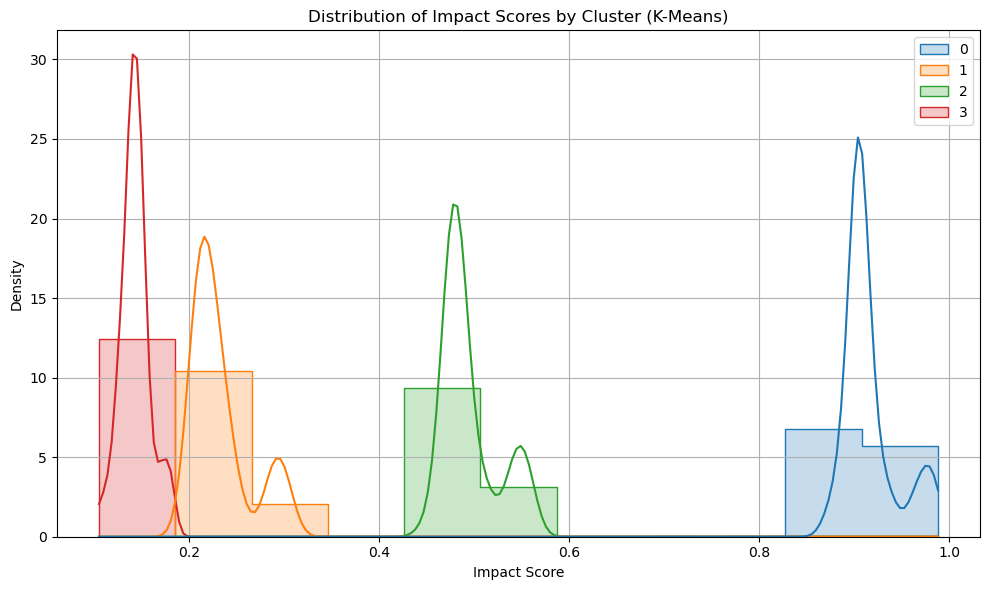

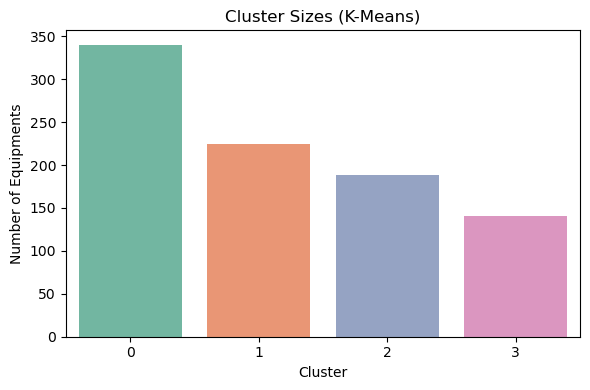

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import time
from sklearn.preprocessing import StandardScaler

def load_kmeans_results(filepath):
    """Load K-Means clustering results"""
    df = pd.read_csv(filepath, delimiter=';')
    return df

def calculate_kmeans_complexity_and_metrics(data, n_clusters=4):
    """Calculate K-Means metrics and execution time"""
    start_time = time.time()
    
    # Standardize data (important for clustering algorithms)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # K-Means clustering
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(data_scaled)
    
    end_time = time.time()
    execution_time = end_time - start_time

    # Metrics
    inertia = model.inertia_  # Sum of squared distances of samples to their closest cluster center
    silhouette = silhouette_score(data_scaled, labels)  # Cohesion and separation of clusters
    calinski = calinski_harabasz_score(data_scaled, labels)  # Higher is better for well-separated clusters
    davies = davies_bouldin_score(data_scaled, labels)  # Lower is better for well-separated clusters

    return execution_time, inertia, silhouette, calinski, davies, labels

def plot_kmeans_results(df, labels):
    """Visualize K-Means clustering results and metrics"""

    # 1. Distribution of Impact Scores by Cluster
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Impact_Score', hue=labels, kde=True,
                 element='step', stat='density', common_norm=False, palette='tab10')
    plt.title("Distribution of Impact Scores by Cluster (K-Means)")
    plt.xlabel("Impact Score")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Cluster Sizes
    plt.figure(figsize=(6, 4))
    sns.countplot(x=labels, palette='Set2')
    plt.title("Cluster Sizes (K-Means)")
    plt.xlabel("Cluster")
    plt.ylabel("Number of Equipments")
    plt.tight_layout()
    plt.show()

def main():
    file_path = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact_with_KMEANS.csv"
    df = load_kmeans_results(file_path)
    
    # Calcul du nombre de clusters
    k = len(df['Cluster'].unique())

    # Calcul des métriques et de la complexité
    execution_time, inertia, silhouette, calinski, davies, labels = calculate_kmeans_complexity_and_metrics(
        df[['Impact_Score']], n_clusters=k
    )

    # Affichage des métriques
    print(f"\n=== K-MEANS PERFORMANCE METRICS ===")
    print(f"Execution Time          : {execution_time:.4f} seconds")
    print(f"Inertia                 : {inertia:.2f}")
    print(f"Silhouette Score        : {silhouette:.3f}")
    print(f"Calinski-Harabasz Index : {calinski:.2f}")
    print(f"Davies-Bouldin Index    : {davies:.3f}")
    
    # Répartition des clusters
    print(f"\nCluster Distribution:")
    cluster_sizes = pd.Series(labels).value_counts().sort_index()
    print(cluster_sizes)

    # Visualisation des clusters
    plot_kmeans_results(df, labels)

if __name__ == "__main__":
    main()


# II- Gaussian Mixture Models (GMM)

# 1- **Summary of Clustering with:**
•	The code uses a **GaussianMixture (GMM)** model and selects the best number of clusters \( K \) (from 2 to 4) based on the **silhouette score**, which measures the quality of the clustering.

•	The model calculates an **impact score** for each equipment and predicts its impact level.


# 2- **Why GaussianMixture (GMM):**

1. **Objective:** To group equipment based on their environmental impact scores in a flexible way.
2. **Advantages:** GMM can handle clusters with different shapes and gives a probability of belonging to each cluster, which is more accurate for complex data.
3. **Why GMM:** It helps to classify equipment more accurately, especially when data has different patterns, making it useful for detailed sustainability analysis.

In [105]:
import pandas as pd
import joblib
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

class EnvironmentalImpactClassifier:
    def __init__(self):
        # Facteurs d'impact environnemental
        self.energy_impact = {
            '1': 0.1,  # Solaire
            '2': 0.8,  # Fioul
            '3': 0.6,  # Gaz
            '4': 0.3   # Electricité
        }
        
        self.category_impact = {
            '1': 0.5,  # Conditionnement
            '2': 0.3,  # Contrôle Qualité
            '3': 0.4,  # Nettoyage
            '4': 0.9,  # Transformation
            '5': 0.8,  # Réfrigération
            '6': 1.0   # Production
        }
        
        self.scaler = StandardScaler()
        self.model = None
        self.n_clusters = 3
        self.initialize_model()

    def initialize_model(self):
        try:
            # Charger le modèle et le scaler sauvegardés
            model_path = Path('environmental_model.pkl')
            scaler_path = Path('environmental_scaler.pkl')

            if model_path.exists() and scaler_path.exists():
                self.model = joblib.load(model_path)
                self.scaler = joblib.load(scaler_path)
                print("Modèle et scaler chargés depuis le disque")

                # Vérification si le modèle est bien un GaussianMixture
                if not isinstance(self.model, GaussianMixture):
                    print("Le modèle chargé n'est pas un GaussianMixture. Réentraînement du modèle...")
                    self.train_new_model()
            else:
                self.train_new_model()
        except Exception as e:
            print(f"Erreur initialisation: {str(e)}")
            self.train_new_model()

    def train_new_model(self):
        # Génération de données d'entraînement
        np.random.seed(42)
        n_samples = 1000
        
        data = {
            'Energy_Impact': np.random.choice(list(self.energy_impact.values()), n_samples),
            'Category_Impact': np.random.choice(list(self.category_impact.values()), n_samples),
            'Lifetime_Impact': np.random.uniform(0.1, 1.0, n_samples)
        }
        
        df = pd.DataFrame(data)
        df['Impact_Score'] = df['Energy_Impact'] * 0.4 + df['Category_Impact'] * 0.5 + (1 - df['Lifetime_Impact']) * 0.1
        
        # Entraînement du scaler
        X = df[['Impact_Score']].values
        X_scaled = self.scaler.fit_transform(X)
        
        # Optimisation des clusters avec GaussianMixture
        best_score = -1
        best_gmm = None
        
        for k in range(2, 5):
            gmm = GaussianMixture(n_components=k, random_state=42)
            gmm.fit(X_scaled)
            labels = gmm.predict(X_scaled)
            score = silhouette_score(X_scaled, labels)
            
            if score > best_score:
                best_score = score
                best_gmm = gmm
                self.n_clusters = k
        
        print(f"Meilleur modèle: {self.n_clusters} clusters (score: {best_score:.2f})")
        self.model = best_gmm
        
        # Sauvegarde du modèle et du scaler
        joblib.dump(self.model, 'environmental_model.pkl')
        joblib.dump(self.scaler, 'environmental_scaler.pkl')

    def calculate_impact_score(self, row):
        try:
            energy = str(row['Fk_Energy']).strip()
            category = str(row['Fk_Category']).strip()
            lifetime = float(row['Estimated_Lifetime_Years'])
            
            return (self.energy_impact.get(energy, 0.5) * 0.4 + 
                    self.category_impact.get(category, 0.5) * 0.5 + 
                    (1 - lifetime/30) * 0.1)
        except Exception as e:
            print(f"Erreur calcul score: {str(e)}")
            return 0.5

    def predict_impact_level(self, scores):
        try:
            # Transformation des scores
            scores_2d = np.array(scores).reshape(-1, 1)
            scores_scaled = self.scaler.transform(scores_2d)

            # Prédiction des clusters avec les indices de clusters
            cluster_indexes = self.model.predict(scores_scaled)

            # Mapping des niveaux d'impact
            levels = ['FAIBLE', 'MODÉRÉ', 'ÉLEVÉ'][:self.n_clusters]
            level_map = {i: levels[i] for i in range(self.n_clusters)}

            return [level_map[c] for c in cluster_indexes]
        except Exception as e:
            print(f"Erreur prédiction: {str(e)}")
            return ['INCONNU'] * len(scores)

    def predict_from_file(self, input_path, output_path):
        try:
            input_path = Path(input_path).absolute()
            output_path = Path(output_path).absolute()
            
            print(f"Traitement du fichier: {input_path}")
            
            # Lecture du fichier
            equipment_df = pd.read_csv(input_path, delimiter=';')
            print("Colonnes détectées:", equipment_df.columns.tolist())
            
            # Vérification des colonnes
            required = ['Fk_Energy', 'Fk_Category', 'Estimated_Lifetime_Years', 'Equipment_Name']
            if not all(col in equipment_df.columns for col in required):
                missing = [col for col in required if col not in equipment_df.columns]
                raise ValueError(f"Colonnes manquantes: {missing}")
            
            # Nettoyage des données
            equipment_df = equipment_df.dropna(subset=required)
            equipment_df['Fk_Energy'] = equipment_df['Fk_Energy'].astype(str).str.strip()
            equipment_df['Fk_Category'] = equipment_df['Fk_Category'].astype(str).str.strip()
            equipment_df['Estimated_Lifetime_Years'] = pd.to_numeric(
                equipment_df['Estimated_Lifetime_Years'], errors='coerce')
            
            # Calcul des scores
            equipment_df['Impact_Score'] = equipment_df.apply(self.calculate_impact_score, axis=1)
            equipment_df['Impact_Level'] = self.predict_impact_level(equipment_df['Impact_Score'].values)
            
            # Sélection des colonnes de sortie
            output_cols = ['Equipment_Name', 'Fk_Energy', 'Fk_Category',
                         'Estimated_Lifetime_Years', 'Impact_Score', 'Impact_Level']
            
            # Sauvegarde
            output_path.parent.mkdir(parents=True, exist_ok=True)
            equipment_df[output_cols].to_csv(output_path, index=False, sep=';', encoding='utf-8-sig')
            print(f"Résultats sauvegardés dans: {output_path}")
            
            return equipment_df
            
        except Exception as e:
            print(f"ERREUR: {str(e)}", file=sys.stderr)
            return None

def main():
    print("\n=== CLASSIFICATION ENVIRONNEMENTALE DES ÉQUIPEMENTS ===")
    
    input_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv"
    output_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_ImpactGMM.csv"
    
    classifier = EnvironmentalImpactClassifier()
    results = classifier.predict_from_file(input_file, output_file)
    
    if results is not None:
        print("\nAperçu des résultats:")
        print(results[['Equipment_Name', 'Fk_Energy', 'Fk_Category',
                     'Estimated_Lifetime_Years', 'Impact_Score', 'Impact_Level']].head())

if __name__ == "__main__":
    main()



=== CLASSIFICATION ENVIRONNEMENTALE DES ÉQUIPEMENTS ===
Modèle et scaler chargés depuis le disque
Traitement du fichier: C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv
Colonnes détectées: ['Pk_Equipment', 'Equipment_ID', 'Equipment_Name', 'Fk_Mfrequency', 'Fk_MCycle', 'Fk_Category', 'Fk_Energy', 'Manufacturer', 'Estimated_Lifetime_Years']
Résultats sauvegardés dans: C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_ImpactGMM.csv

Aperçu des résultats:
                  Equipment_Name Fk_Energy Fk_Category  \
0  Machine d'Inspection Visuelle         1           1   
1             Cuve de Maturation         1           2   
2  Machine d'Inspection Visuelle         2           3   
3       Système de Nettoyage CIP         2           1   
4         Robot de Palettisation         1           1   

   Estimated_Lifetime_Years  Impact_Score Impact_Level  
0                        17      0.333333       FAIBLE  
1                        12      0.250000  

# 3- Distribution of Impact Scores by Cluster (GMM) & Cluster Sizes & Silhouette Score 


=== Résultats DBSCAN ===
  Méthode  Silhouette  Calinski-Harabasz  Davies-Bouldin  Clusters
0  DBSCAN    0.674137        3244.893857        0.346485         3


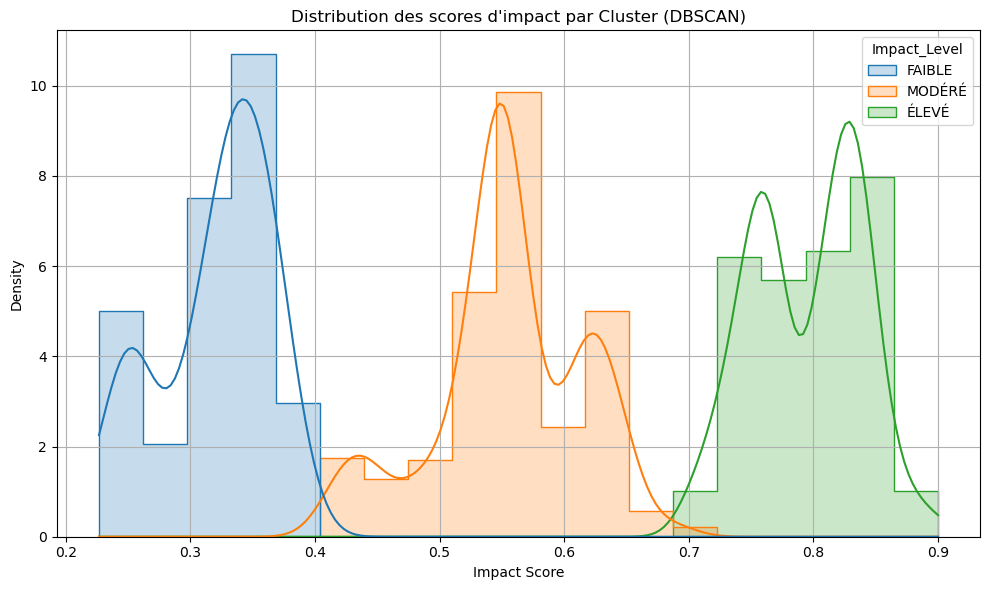

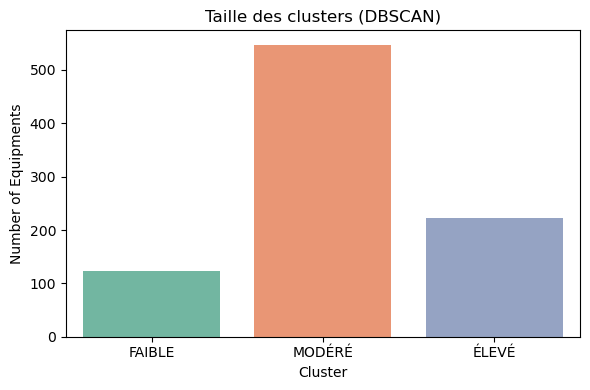

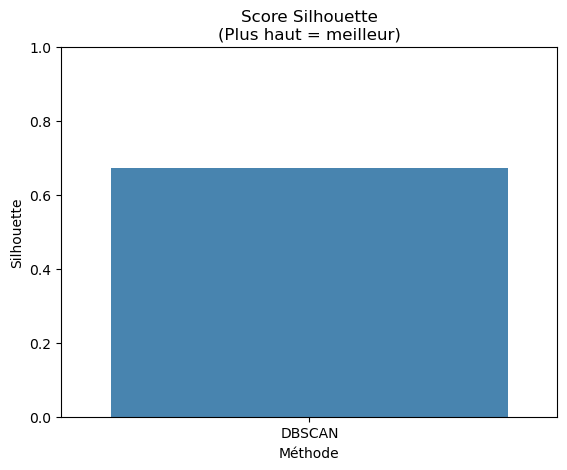


Temps d'exécution pour DBSCAN: 0.0150 secondes


In [54]:
def plot_dbscan_results(df, metrics_df):
    """Visualisation des résultats de DBSCAN"""
    # Distribution des scores d'impact par Cluster
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Impact_Score', hue='Impact_Level', kde=True, element='step', stat='density', common_norm=False)
    plt.title("Distribution des scores d'impact par Cluster (DBSCAN)")
    plt.xlabel("Impact Score")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Taille des clusters
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Impact_Level', data=df, palette='Set2')
    plt.title("Taille des clusters (DBSCAN)")
    plt.xlabel("Cluster")
    plt.ylabel("Number of Equipments")
    plt.tight_layout()
    plt.show()

    # Visualisation des métriques
    sns.barplot(x='Méthode', y='Silhouette', data=metrics_df, palette='Blues_d')
    plt.title('Score Silhouette\n(Plus haut = meilleur)')
    plt.ylim(0, 1)
    plt.show()

def calculate_complexity_dbscan(data):
    """Calcule la complexité (temps d'exécution) de DBSCAN"""
    start_time = time.time()
    db = DBSCAN()
    db.fit(data)
    end_time = time.time()
    return end_time - start_time

def main_dbscan():
    # Charger les résultats
    dbscan = load_dbscan_results()
    
    # Préparation des données
    dbscan = encode_labels(dbscan)
    
    # Calcul des métriques
    metrics = calculate_metrics(dbscan, 'DBSCAN')
    metrics_df = pd.DataFrame([metrics])
    
    # Affichage des résultats
    print("\n=== Résultats DBSCAN ===")
    print(metrics_df.drop(columns=['Distribution']))
    
    # Visualisations
    plot_dbscan_results(dbscan, metrics_df)
    
    # Calcul de la complexité
    dbscan_complexity = calculate_complexity_dbscan(dbscan[['Impact_Score']].values)
    print(f"\nTemps d'exécution pour DBSCAN: {dbscan_complexity:.4f} secondes")

if __name__ == "__main__":
    main_dbscan()


# III- DBSCAN

# 1- summary 
•	This code uses the DBSCAN algorithm to classify equipment based on their environmental impact. 

•	DBSCAN, which operates on the density of data points, identifies clusters of equipment with similar characteristics by grouping nearby points and considering isolated points as noise. 

•	The model calculates an impact score for each piece of equipment based on its energy type, category, and lifespan, then determines its impact level (low, moderate, high) based on this score. 

•	If DBSCAN fails to find clusters, an alternative model is used to segment the data.


 ### 2- **Why DBSCAN:**

1. **Objective:** To group equipment by environmental impact while detecting outliers.
2. **Advantages:**
   - **Density-Based:** Identifies clusters of varying shapes and sizes.
   - **Outlier Detection:** Marks data points that don’t belong to any cluster.
   - **No Need for Predefined Clusters:** Doesn’t require setting the number of clusters in advance.
3. **Why DBSCAN:** It’s ideal for data with irregular clusters and outliers, offering better insight into environmental impacts and helping identify extreme cases.

# 3- Density of Energy Consumption vs. CO2 Emissions

['Press' 'Filter' 'Heater' 'Cooler' 'Mixer']


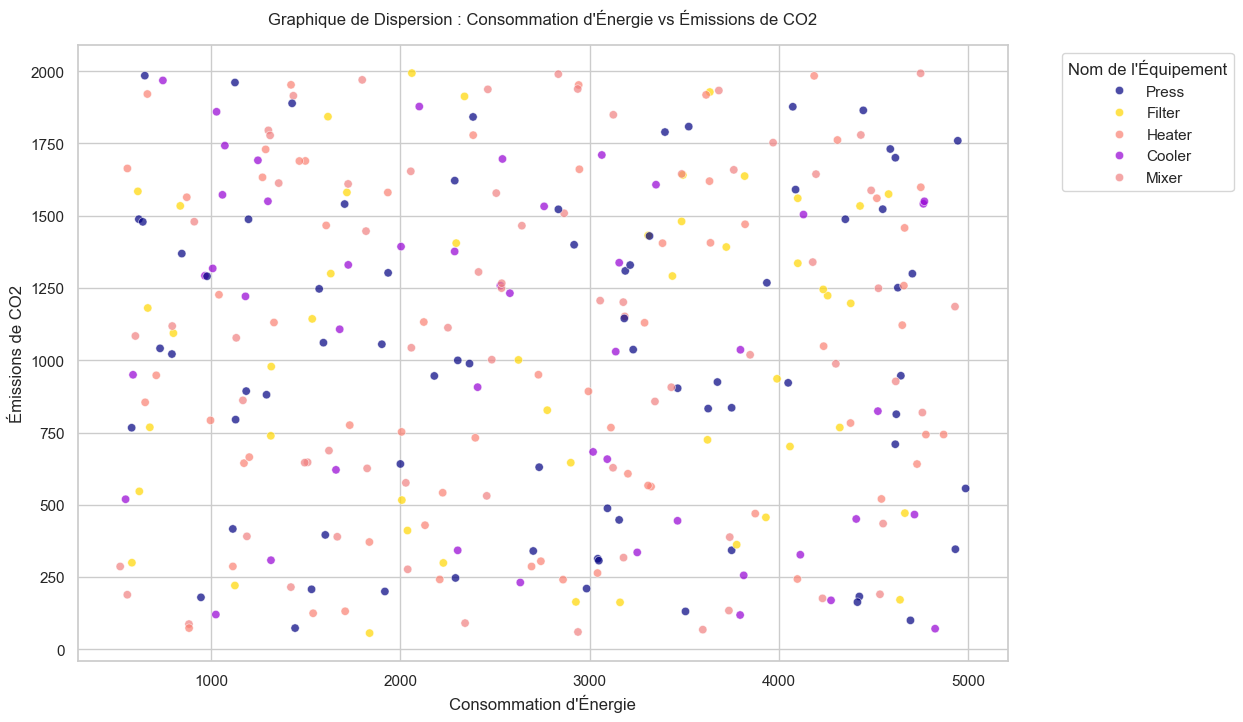

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà un DataFrame nommé df
# Nettoyer les noms de colonnes
df.columns = df.columns.str.strip()

# Afficher les noms uniques des équipements
unique_equipments = df['equipment_name'].unique()
print(unique_equipments)

# Palette mise à jour avec tous les noms d'équipements
palette = {
    'Cuve de Maturation': 'blue',
    'Évaporaeur': 'orange',
    'Ligne de Production Yaourt': 'green',
    'Machine de Mélaf': 'red',
    'Machine de Mélange Automatiques': 'purple',
    'Machine de Remplissage': 'brown',
    'Machine d\'Emballage': 'cyan',
    'Machine d\'Inspection Visuelle': 'magenta',
    'Machine dj': 'lime',
    'Pasteurisateur Lait': 'pink',
    'Robot de Palettisation': 'gray',
    'Système de Nettoyage CIP': 'olive',
    'Système de Pasteurisation': 'teal',
    'Press': 'navy',
    'Filter': 'gold',
    'Heater': 'salmon',
    'Cooler': 'darkviolet',
    'Mixer': 'lightcoral'
}

# Créer le graphique de dispersion
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='energy_consumption', y='CO2_emissions', hue='equipment_name', palette=palette, alpha=0.7)
plt.title('Graphique de Dispersion : Consommation d\'Énergie vs Émissions de CO2')
plt.xlabel('Consommation d\'Énergie')
plt.ylabel('Émissions de CO2')
plt.grid(True)
plt.legend(title='Nom de l\'Équipement', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [146]:
import pandas as pd
import joblib
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

class EnvironmentalImpactClassifier:
    def __init__(self):
        # Facteurs d'impact environnemental
        self.energy_impact = {
            '1': 0.1,  # Solaire
            '2': 0.8,  # Fioul
            '3': 0.6,  # Gaz
            '4': 0.3   # Electricité
        }
        
        self.category_impact = {
            '1': 0.5,  # Conditionnement
            '2': 0.3,  # Contrôle Qualité
            '3': 0.4,  # Nettoyage
            '4': 0.9,  # Transformation
            '5': 0.8,  # Réfrigération
            '6': 1.0   # Production
        }
        
        self.scaler = StandardScaler()
        self.model = None
        self.n_clusters = 0
        # Seuils fixes pour la classification des niveaux d'impact
        self.impact_thresholds = {
            'FAIBLE': 0.4,     # Scores inférieurs à 0.4
            'MODÉRÉ': 0.7      # Scores entre 0.4 et 0.7
            # Au-dessus de 0.7 sera considéré comme ÉLEVÉ
        }
        self.initialize_model()

    def initialize_model(self):
        try:
            model_path = Path('environmental_model_dbscan.pkl')
            scaler_path = Path('environmental_scaler_dbscan.pkl')

            if model_path.exists() and scaler_path.exists():
                self.model = joblib.load(model_path)
                self.scaler = joblib.load(scaler_path)
                print("Modèle et scaler chargés depuis le disque")
                
                if not isinstance(self.model, DBSCAN):
                    print("Mauvais type de modèle. Réentraînement...")
                    self.train_new_model()
            else:
                self.train_new_model()
        except Exception as e:
            print(f"Erreur initialisation: {str(e)}")
            self.train_new_model()

    def train_new_model(self):
        # Génération de données plus adaptées pour DBSCAN
        np.random.seed(42)
        n_samples = 1000
        
        # Création de 3 groupes distincts avec différentes distributions
        group1 = {
            'Energy_Impact': np.random.normal(0.2, 0.05, n_samples//3),
            'Category_Impact': np.random.normal(0.3, 0.05, n_samples//3),
            'Lifetime_Impact': np.random.uniform(0.1, 0.4, n_samples//3)
        }
        
        group2 = {
            'Energy_Impact': np.random.normal(0.5, 0.1, n_samples//3),
            'Category_Impact': np.random.normal(0.6, 0.1, n_samples//3),
            'Lifetime_Impact': np.random.uniform(0.4, 0.7, n_samples//3)
        }
        
        group3 = {
            'Energy_Impact': np.random.normal(0.8, 0.05, n_samples//3),
            'Category_Impact': np.random.normal(0.9, 0.05, n_samples//3),
            'Lifetime_Impact': np.random.uniform(0.7, 1.0, n_samples//3)
        }
        
        # Combinaison des groupes
        data = {
            'Energy_Impact': np.concatenate([group1['Energy_Impact'], group2['Energy_Impact'], group3['Energy_Impact']]),
            'Category_Impact': np.concatenate([group1['Category_Impact'], group2['Category_Impact'], group3['Category_Impact']]),
            'Lifetime_Impact': np.concatenate([group1['Lifetime_Impact'], group2['Lifetime_Impact'], group3['Lifetime_Impact']])
        }
        
        df = pd.DataFrame(data)
        df['Impact_Score'] = df['Energy_Impact'] * 0.4 + df['Category_Impact'] * 0.5 + (1 - df['Lifetime_Impact']) * 0.1
        
        # Standardisation
        X = df[['Impact_Score']].values
        X_scaled = self.scaler.fit_transform(X)
        
        # Optimisation des paramètres DBSCAN
        best_score = -1
        best_dbscan = None
        
        # Paramètres à tester
        eps_values = [0.1, 0.2, 0.3, 0.4, 0.5]
        min_samples_values = [5, 10, 15]
        
        for eps in eps_values:
            for min_samples in min_samples_values:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(X_scaled)
                
                # On ignore les cas où il n'y a pas de clusters valides
                unique_labels = set(labels)
                if len(unique_labels) == 1 and -1 in unique_labels:  # Tout est du bruit
                    continue
                if len(unique_labels) < 2:  # Un seul cluster
                    continue
                
                # Calcul du score de silhouette (en ignorant le bruit)
                if -1 in labels:
                    mask = labels != -1
                    if sum(mask) < 2:  # Pas assez de points pour calculer le score
                        continue
                    score = silhouette_score(X_scaled[mask], labels[mask])
                else:
                    score = silhouette_score(X_scaled, labels)
                
                if score > best_score:
                    best_score = score
                    best_dbscan = dbscan
                    self.n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
        
        if best_dbscan is None:
            # Fallback si DBSCAN échoue - utiliser un clustering simple
            print("DBSCAN n'a pas trouvé de clusters, utilisation de KMeans comme fallback")
            from sklearn.cluster import KMeans
            kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X_scaled)
            best_dbscan = kmeans  # On stocke quand même dans la variable dbscan pour la compatibilité
            self.n_clusters = 3
            best_score = silhouette_score(X_scaled, labels)
        
        print(f"Meilleur modèle: {self.n_clusters} clusters (score: {best_score:.2f})")
        self.model = best_dbscan
        
        # Sauvegarde
        joblib.dump(self.model, 'environmental_model_dbscan.pkl')
        joblib.dump(self.scaler, 'environmental_scaler_dbscan.pkl')

    def calculate_impact_score(self, row):
        try:
            energy = str(row['Fk_Energy']).strip()
            category = str(row['Fk_Category']).strip()
            lifetime = float(row['Estimated_Lifetime_Years'])
            
            # Limiter la durée de vie à 30 ans pour le calcul
            normalized_lifetime = min(lifetime, 30) / 30
            
            return (self.energy_impact.get(energy, 0.5) * 0.4 + 
                    self.category_impact.get(category, 0.5) * 0.5 + 
                    (1 - normalized_lifetime) * 0.1)
        except Exception as e:
            print(f"Erreur calcul score: {str(e)}")
            return 0.5

    def get_impact_level(self, score):
        """
        Déterminer le niveau d'impact en fonction du score et des seuils définis
        """
        if score < self.impact_thresholds['FAIBLE']:
            return 'FAIBLE'
        elif score < self.impact_thresholds['MODÉRÉ']:
            return 'MODÉRÉ'
        else:
            return 'ÉLEVÉ'

    def predict_impact_level(self, scores):
        try:
            # Approche hybride: utiliser à la fois les seuils fixes et le clustering
            impact_levels = []
            
            for score in scores:
                # 1. Détermination du niveau par seuil directement
                level = self.get_impact_level(score)
                impact_levels.append(level)
            
            return impact_levels
        except Exception as e:
            print(f"Erreur prédiction: {str(e)}")
            return ['INCONNU'] * len(scores)

    def predict_from_file(self, input_path, output_path):
        try:
            input_path = Path(input_path).absolute()
            output_path = Path(output_path).absolute()
            
            print(f"Traitement du fichier: {input_path}")
            
            equipment_df = pd.read_csv(input_path, delimiter=';')
            print("Colonnes détectées:", equipment_df.columns.tolist())
            
            required = ['Fk_Energy', 'Fk_Category', 'Estimated_Lifetime_Years', 'Equipment_Name']
            if not all(col in equipment_df.columns for col in required):
                missing = [col for col in required if col not in equipment_df.columns]
                raise ValueError(f"Colonnes manquantes: {missing}")
            
            equipment_df = equipment_df.dropna(subset=required)
            equipment_df['Fk_Energy'] = equipment_df['Fk_Energy'].astype(str).str.strip()
            equipment_df['Fk_Category'] = equipment_df['Fk_Category'].astype(str).str.strip()
            equipment_df['Estimated_Lifetime_Years'] = pd.to_numeric(
                equipment_df['Estimated_Lifetime_Years'], errors='coerce')
            
            # Calculer les scores d'impact
            equipment_df['Impact_Score'] = equipment_df.apply(self.calculate_impact_score, axis=1)
            
            # Prédire les niveaux d'impact
            equipment_df['Impact_Level'] = self.predict_impact_level(equipment_df['Impact_Score'].values)
            
            # Ajouter des colonnes d'information explicatives
            equipment_df['Energy_Type'] = equipment_df['Fk_Energy'].map({
                '1': 'Solaire', '2': 'Fioul', '3': 'Gaz', '4': 'Electricité'
            })
            
            equipment_df['Category_Type'] = equipment_df['Fk_Category'].map({
                '1': 'Conditionnement', '2': 'Contrôle Qualité', 
                '3': 'Nettoyage', '4': 'Transformation',
                '5': 'Réfrigération', '6': 'Production'
            })
            
            # Statistiques sur la distribution des niveaux d'impact
            impact_distribution = equipment_df['Impact_Level'].value_counts()
            print("\nDistribution des niveaux d'impact:")
            for level, count in impact_distribution.items():
                percentage = count / len(equipment_df) * 100
                print(f"  {level}: {count} équipements ({percentage:.1f}%)")
            
            output_cols = ['Equipment_Name', 'Energy_Type', 'Category_Type',
                         'Estimated_Lifetime_Years', 'Impact_Score', 'Impact_Level']
            
            output_path.parent.mkdir(parents=True, exist_ok=True)
            equipment_df[output_cols].to_csv(output_path, index=False, sep=';', encoding='utf-8-sig')
            print(f"Résultats sauvegardés dans: {output_path}")
            
            return equipment_df
            
        except Exception as e:
            print(f"ERREUR: {str(e)}", file=sys.stderr)
            return None

def main():
    print("\n=== CLASSIFICATION ENVIRONNEMENTALE DES ÉQUIPEMENTS ===")
    
    input_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv"
    output_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact_DBSCAN.csv"
    
    classifier = EnvironmentalImpactClassifier()
    results = classifier.predict_from_file(input_file, output_file)
    
    if results is not None:
        print("\nAperçu des résultats:")
        print(results[['Equipment_Name', 'Energy_Type', 'Category_Type',
                     'Estimated_Lifetime_Years', 'Impact_Score', 'Impact_Level']].head())

if __name__ == "__main__":
    main()


=== CLASSIFICATION ENVIRONNEMENTALE DES ÉQUIPEMENTS ===
Modèle et scaler chargés depuis le disque
Traitement du fichier: C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv
Colonnes détectées: ['Pk_Equipment', 'Equipment_ID', 'Equipment_Name', 'Fk_Mfrequency', 'Fk_MCycle', 'Fk_Category', 'Fk_Energy', 'Manufacturer', 'Estimated_Lifetime_Years']

Distribution des niveaux d'impact:
  MODÉRÉ: 547 équipements (61.2%)
  ÉLEVÉ: 223 équipements (24.9%)
  FAIBLE: 124 équipements (13.9%)
Résultats sauvegardés dans: C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact_DBSCAN.csv

Aperçu des résultats:
                  Equipment_Name Energy_Type     Category_Type  \
0  Machine d'Inspection Visuelle     Solaire   Conditionnement   
1             Cuve de Maturation     Solaire  Contrôle Qualité   
2  Machine d'Inspection Visuelle       Fioul         Nettoyage   
3       Système de Nettoyage CIP       Fioul   Conditionnement   
4         Robot de Palettisation   

# 4- Distribution of Impact Scores by Cluster (DBSCAN) & Cluster Sizes & Silhouette Score 


=== DBSCAN Results ===
   Method  Silhouette  Calinski-Harabasz  Davies-Bouldin  Clusters
0  DBSCAN    0.674137        3244.893857        0.346485         3


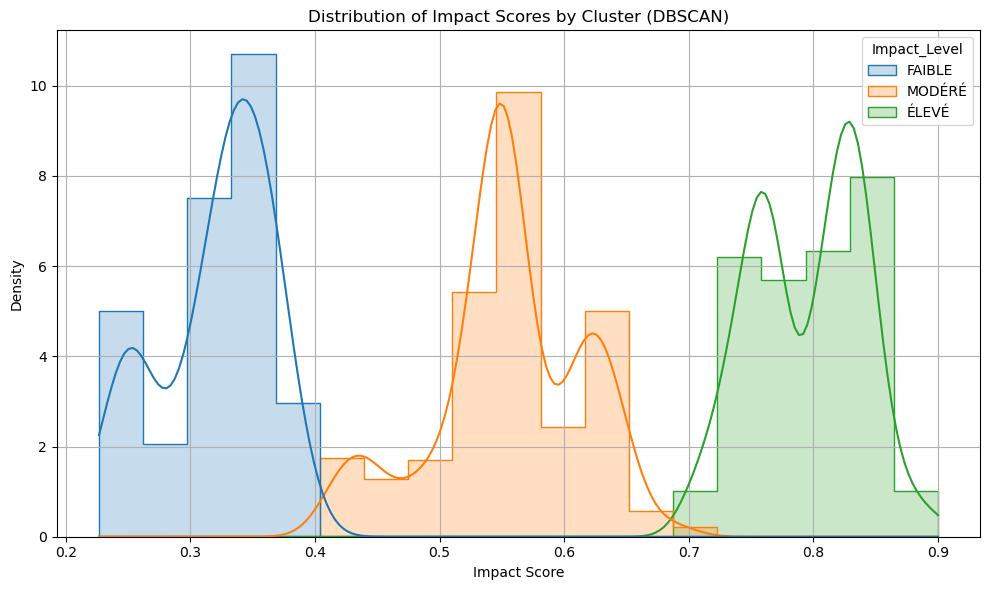

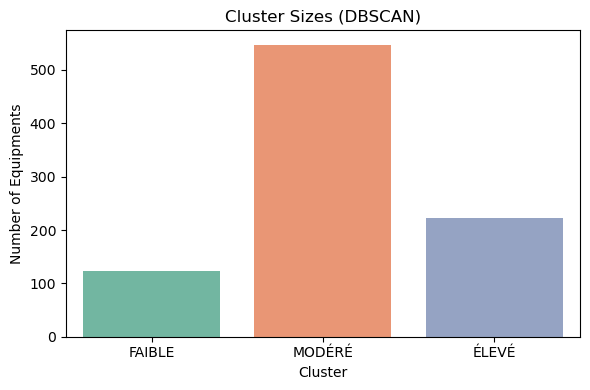

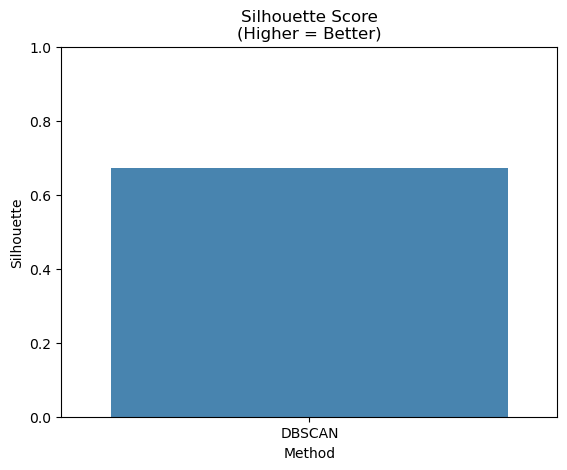


Execution time for DBSCAN: 0.0212 seconds


In [49]:
def plot_dbscan_results(df, metrics_df):
    """Visualize DBSCAN clustering results"""
    # Distribution of impact scores by cluster
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='Impact_Score', hue='Impact_Level', kde=True, element='step', stat='density', common_norm=False)
    plt.title("Distribution of Impact Scores by Cluster (DBSCAN)")
    plt.xlabel("Impact Score")
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Cluster sizes
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Impact_Level', data=df, palette='Set2')
    plt.title("Cluster Sizes (DBSCAN)")
    plt.xlabel("Cluster")
    plt.ylabel("Number of Equipments")
    plt.tight_layout()
    plt.show()

    # Metric visualization
    sns.barplot(x='Method', y='Silhouette', data=metrics_df, palette='Blues_d')
    plt.title('Silhouette Score\n(Higher = Better)')
    plt.ylim(0, 1)
    plt.show()

def calculate_complexity_dbscan(data):
    """Calculate execution time for DBSCAN"""
    start_time = time.time()
    db = DBSCAN()
    db.fit(data)
    end_time = time.time()
    return end_time - start_time

def main_dbscan():
    # Load clustering results
    dbscan = load_dbscan_results()
    
    # Prepare data
    dbscan = encode_labels(dbscan)
    
    # Compute evaluation metrics
    metrics = calculate_metrics(dbscan, 'DBSCAN')
    metrics_df = pd.DataFrame([metrics])
    
    # Display results
    print("\n=== DBSCAN Results ===")
    print(metrics_df.drop(columns=['Distribution']))
    
    # Visualizations
    plot_dbscan_results(dbscan, metrics_df)
    
    # Calculate algorithm complexity (execution time)
    dbscan_complexity = calculate_complexity_dbscan(dbscan[['Impact_Score']].values)
    print(f"\nExecution time for DBSCAN: {dbscan_complexity:.4f} seconds")

if __name__ == "__main__":
    main_dbscan()


# IV- Hierarchical Clustering

# 1- Summary
This code applies Hierarchical Clustering to classify equipment based on their environmental impact scores.

Each equipment is initially a separate cluster; the algorithm merges the most similar ones step-by-step to form a tree-like structure (dendrogram).

Impact scores are calculated using energy type, category, and lifespan, then used for clustering and assigning impact levels (low, moderate, high).

# 2- Why Hierarchical Clustering:
Goal: Understand similarities between equipment and form meaningful groups.

Advantages:

No need to predefine the number of clusters.

Provides a dendrogram for visual interpretation.

Deterministic and good for small to medium datasets.

Why this method:
It reveals natural groupings and the structure of environmental impact relationships—great for insight and reporting.

In [1]:
import pandas as pd
import joblib
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from pathlib import Path
import sys
import warnings
warnings.filterwarnings('ignore')

class EnvironmentalImpactClassifier:
    def __init__(self):
        self.energy_impact = {
            '1': 0.1,  # Solaire
            '2': 0.8,  # Fioul
            '3': 0.6,  # Gaz
            '4': 0.3   # Electricité
        }
        self.category_impact = {
            '1': 0.5,  # Conditionnement
            '2': 0.3,  # Contrôle Qualité
            '3': 0.4,  # Nettoyage
            '4': 0.9,  # Transformation
            '5': 0.8,  # Réfrigération
            '6': 1.0   # Production
        }
        self.scaler = StandardScaler()
        self.model = None
        self.n_clusters = 0
        self.impact_thresholds = {
            'FAIBLE': 0.4,
            'MODÉRÉ': 0.7
        }
        self.initialize_model()

    def initialize_model(self):
        try:
            model_path = Path('environmental_model_hierarchical.pkl')
            scaler_path = Path('environmental_scaler_hierarchical.pkl')

            if model_path.exists() and scaler_path.exists():
                self.model = joblib.load(model_path)
                self.scaler = joblib.load(scaler_path)
                print("Modèle et scaler chargés depuis le disque")
            else:
                self.train_new_model()
        except Exception as e:
            print(f"Erreur initialisation: {str(e)}")
            self.train_new_model()

    def train_new_model(self):
        np.random.seed(42)
        n_samples = 1000

        group1 = {
            'Energy_Impact': np.random.normal(0.2, 0.05, n_samples//3),
            'Category_Impact': np.random.normal(0.3, 0.05, n_samples//3),
            'Lifetime_Impact': np.random.uniform(0.1, 0.4, n_samples//3)
        }
        group2 = {
            'Energy_Impact': np.random.normal(0.5, 0.1, n_samples//3),
            'Category_Impact': np.random.normal(0.6, 0.1, n_samples//3),
            'Lifetime_Impact': np.random.uniform(0.4, 0.7, n_samples//3)
        }
        group3 = {
            'Energy_Impact': np.random.normal(0.8, 0.05, n_samples//3),
            'Category_Impact': np.random.normal(0.9, 0.05, n_samples//3),
            'Lifetime_Impact': np.random.uniform(0.7, 1.0, n_samples//3)
        }

        data = {
            'Energy_Impact': np.concatenate([group1['Energy_Impact'], group2['Energy_Impact'], group3['Energy_Impact']]),
            'Category_Impact': np.concatenate([group1['Category_Impact'], group2['Category_Impact'], group3['Category_Impact']]),
            'Lifetime_Impact': np.concatenate([group1['Lifetime_Impact'], group2['Lifetime_Impact'], group3['Lifetime_Impact']])
        }

        df = pd.DataFrame(data)
        df['Impact_Score'] = df['Energy_Impact'] * 0.4 + df['Category_Impact'] * 0.5 + (1 - df['Lifetime_Impact']) * 0.1

        X = df[['Impact_Score']].values
        X_scaled = self.scaler.fit_transform(X)

        best_score = -1
        best_model = None

        for n_clusters in range(2, 6):
            model = AgglomerativeClustering(n_clusters=n_clusters)
            labels = model.fit_predict(X_scaled)

            score = silhouette_score(X_scaled, labels)
            if score > best_score:
                best_score = score
                best_model = model
                self.n_clusters = n_clusters

        self.model = best_model
        print(f"Meilleur modèle: {self.n_clusters} clusters (score silhouette: {best_score:.2f})")

        joblib.dump(self.model, 'environmental_model_hierarchical.pkl')
        joblib.dump(self.scaler, 'environmental_scaler_hierarchical.pkl')

    def calculate_impact_score(self, row):
        try:
            energy = str(row['Fk_Energy']).strip()
            category = str(row['Fk_Category']).strip()
            lifetime = float(row['Estimated_Lifetime_Years'])
            normalized_lifetime = min(lifetime, 30) / 30
            return (self.energy_impact.get(energy, 0.5) * 0.4 + 
                    self.category_impact.get(category, 0.5) * 0.5 + 
                    (1 - normalized_lifetime) * 0.1)
        except Exception as e:
            print(f"Erreur calcul score: {str(e)}")
            return 0.5

    def get_impact_level(self, score):
        if score < self.impact_thresholds['FAIBLE']:
            return 'FAIBLE'
        elif score < self.impact_thresholds['MODÉRÉ']:
            return 'MODÉRÉ'
        else:
            return 'ÉLEVÉ'

    def predict_impact_level(self, scores):
        try:
            impact_levels = [self.get_impact_level(score) for score in scores]
            return impact_levels
        except Exception as e:
            print(f"Erreur prédiction: {str(e)}")
            return ['INCONNU'] * len(scores)

    def predict_from_file(self, input_path, output_path):
        try:
            input_path = Path(input_path).absolute()
            output_path = Path(output_path).absolute()

            print(f"Traitement du fichier: {input_path}")

            equipment_df = pd.read_csv(input_path, delimiter=';')
            print("Colonnes détectées:", equipment_df.columns.tolist())

            required = ['Fk_Energy', 'Fk_Category', 'Estimated_Lifetime_Years', 'Equipment_Name']
            if not all(col in equipment_df.columns for col in required):
                missing = [col for col in required if col not in equipment_df.columns]
                raise ValueError(f"Colonnes manquantes: {missing}")

            equipment_df = equipment_df.dropna(subset=required)
            equipment_df['Fk_Energy'] = equipment_df['Fk_Energy'].astype(str).str.strip()
            equipment_df['Fk_Category'] = equipment_df['Fk_Category'].astype(str).str.strip()
            equipment_df['Estimated_Lifetime_Years'] = pd.to_numeric(
                equipment_df['Estimated_Lifetime_Years'], errors='coerce')

            equipment_df['Impact_Score'] = equipment_df.apply(self.calculate_impact_score, axis=1)
            equipment_df['Impact_Level'] = self.predict_impact_level(equipment_df['Impact_Score'].values)

            equipment_df['Energy_Type'] = equipment_df['Fk_Energy'].map({
                '1': 'Solaire', '2': 'Fioul', '3': 'Gaz', '4': 'Electricité'
            })
            equipment_df['Category_Type'] = equipment_df['Fk_Category'].map({
                '1': 'Conditionnement', '2': 'Contrôle Qualité',
                '3': 'Nettoyage', '4': 'Transformation',
                '5': 'Réfrigération', '6': 'Production'
            })

            impact_distribution = equipment_df['Impact_Level'].value_counts()
            print("\nDistribution des niveaux d'impact:")
            for level, count in impact_distribution.items():
                percentage = count / len(equipment_df) * 100
                print(f"  {level}: {count} équipements ({percentage:.1f}%)")

            output_cols = ['Equipment_Name', 'Energy_Type', 'Category_Type',
                           'Estimated_Lifetime_Years', 'Impact_Score', 'Impact_Level']

            output_path.parent.mkdir(parents=True, exist_ok=True)
            equipment_df[output_cols].to_csv(output_path, index=False, sep=';', encoding='utf-8-sig')
            print(f"Résultats sauvegardés dans: {output_path}")

            return equipment_df

        except Exception as e:
            print(f"ERREUR: {str(e)}", file=sys.stderr)
            return None

def main():
    print("\n=== CLASSIFICATION ENVIRONNEMENTALE DES ÉQUIPEMENTS (Hierarchical) ===")

    input_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv"
    output_file = r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact_Hierarchical.csv"

    classifier = EnvironmentalImpactClassifier()
    results = classifier.predict_from_file(input_file, output_file)

    if results is not None:
        print("\nAperçu des résultats:")
        print(results[['Equipment_Name', 'Energy_Type', 'Category_Type',
                       'Estimated_Lifetime_Years', 'Impact_Score', 'Impact_Level']].head())

if __name__ == "__main__":
    main()



=== CLASSIFICATION ENVIRONNEMENTALE DES ÉQUIPEMENTS (Hierarchical) ===
Meilleur modèle: 3 clusters (score silhouette: 0.76)
Traitement du fichier: C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Dim_Equipment.csv
Colonnes détectées: ['Pk_Equipment', 'Equipment_ID', 'Equipment_Name', 'Fk_Mfrequency', 'Fk_MCycle', 'Fk_Category', 'Fk_Energy', 'Manufacturer', 'Estimated_Lifetime_Years']

Distribution des niveaux d'impact:
  MODÉRÉ: 547 équipements (61.2%)
  ÉLEVÉ: 223 équipements (24.9%)
  FAIBLE: 124 équipements (13.9%)
Résultats sauvegardés dans: C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact_Hierarchical.csv

Aperçu des résultats:
                  Equipment_Name Energy_Type     Category_Type  \
0  Machine d'Inspection Visuelle     Solaire   Conditionnement   
1             Cuve de Maturation     Solaire  Contrôle Qualité   
2  Machine d'Inspection Visuelle       Fioul         Nettoyage   
3       Système de Nettoyage CIP       Fioul   Conditionnement   
4  

# 3- Distribution of Impact Scores by Cluster (Hierarchical Clustering) & Cluster Sizes & Silhouette Score 

=== Clustering Metrics ===
Silhouette Score:         0.6995
Calinski-Harabasz Score:  3982.8877
Davies-Bouldin Score:     0.3936
Number of Clusters:       3


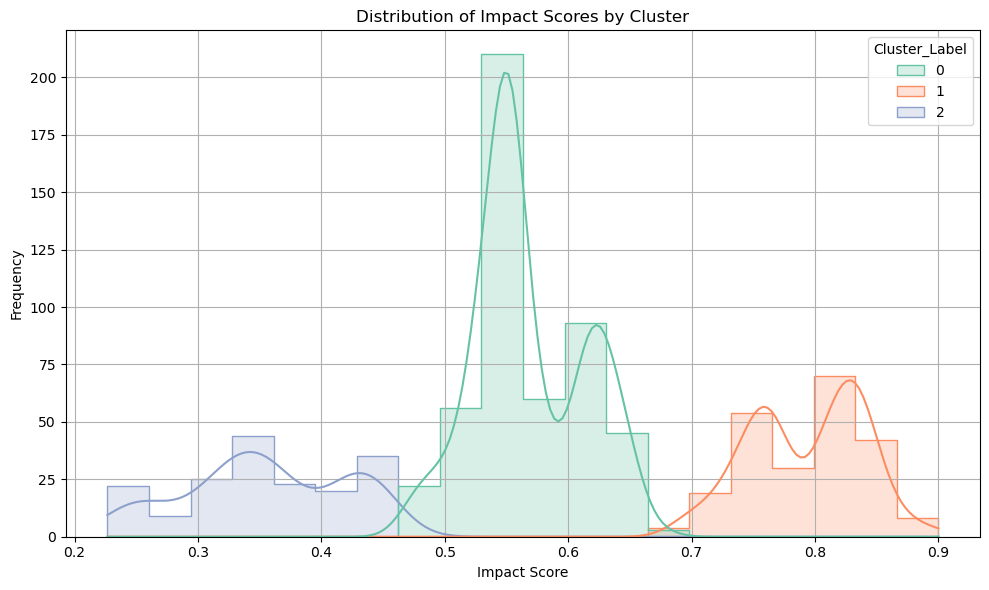

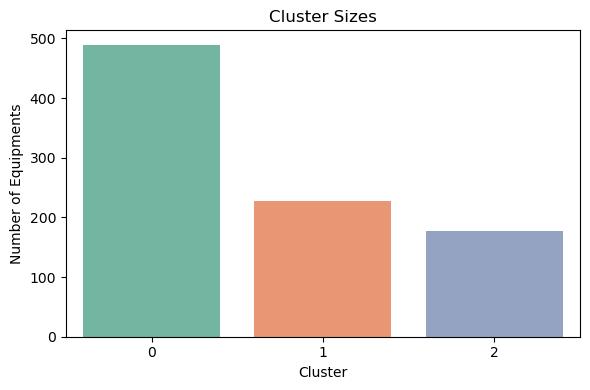

In [12]:

warnings.filterwarnings('ignore')

# === Chargement des données déjà enrichies par le premier script ===
df = pd.read_csv(r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact_Hierarchical.csv", sep=';')

# === Prétraitement pour clustering ===
X = df[['Impact_Score']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Appliquer un nouveau clustering hiérarchique (pour avoir les labels) ===
n_clusters = 3
model = AgglomerativeClustering(n_clusters=n_clusters)
labels = model.fit_predict(X_scaled)

# === Calcul des métriques ===
silhouette = silhouette_score(X_scaled, labels)
calinski = calinski_harabasz_score(X_scaled, labels)
davies = davies_bouldin_score(X_scaled, labels)

print("=== Clustering Metrics ===")
print(f"Silhouette Score:         {silhouette:.4f}")
print(f"Calinski-Harabasz Score:  {calinski:.4f}")
print(f"Davies-Bouldin Score:     {davies:.4f}")
print(f"Number of Clusters:       {n_clusters}")

# === Ajouter les labels au dataframe ===
df['Cluster_Label'] = labels

# === Visualisation : Distribution par Cluster ===
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Impact_Score', hue='Cluster_Label', palette='Set2', bins=20, kde=True, element='step')
plt.title("Distribution of Impact Scores by Cluster")
plt.xlabel("Impact Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Visualisation : Effectif des clusters ===
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster_Label', data=df, palette='Set2')
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Equipments")
plt.tight_layout()
plt.show()


# VI- COMPARISON OF CLUSTERING METHODS


=== COMPARAISON DES MÉTHODES DE CLUSTERING ===
        Méthode  Silhouette  Calinski-Harabasz  Davies-Bouldin  Clusters
0        DBSCAN    0.674137        3244.893857        0.346485         3
1           GMM    0.688855        3722.546923        0.365597         3
2  Hierarchical    0.699514        3982.887686        0.393579         3


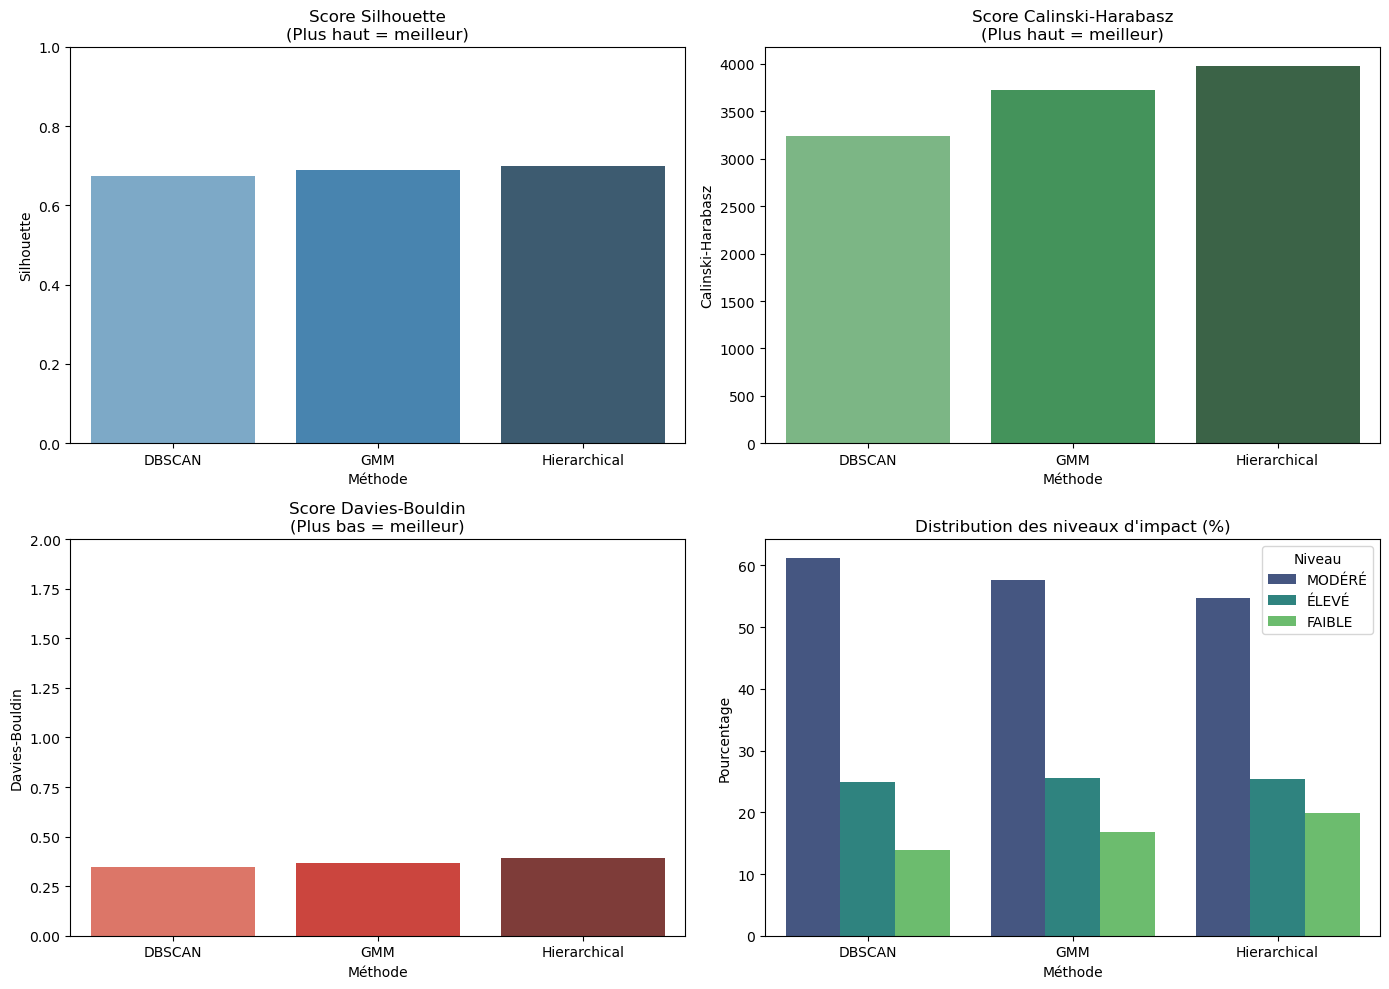


=== RECOMMANDATION ===
Basé sur les métriques, la méthode recommandée est: Hierarchical


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def load_results():
    """Charge les résultats de GMM, DBSCAN, et les données pour Hierarchical"""
    dbscan = pd.read_csv(r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact_DBSCAN.csv", delimiter=';')
    gmm = pd.read_csv(r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_ImpactGMM.csv", delimiter=';')
    data = pd.read_csv(r"C:\Users\user\OneDrive - ESPRIT\Bureau\projet\Equipment_Environmental_Impact.csv", delimiter=';')
    return dbscan, gmm, data

def encode_labels(df):
    """Encode les labels en valeurs numériques pour le calcul des métriques"""
    level_map = {'FAIBLE': 0, 'MODÉRÉ': 1, 'ÉLEVÉ': 2, 'INCONNU': -1}
    df['Impact_Level_Encoded'] = df['Impact_Level'].map(level_map)
    return df

def calculate_metrics(df, method_name):
    """Calcule les métriques d'évaluation pour un modèle"""
    if 'Impact_Level_Encoded' not in df.columns:
        return None

    labels = df['Impact_Level_Encoded'].values
    scores = df['Impact_Score'].values.reshape(-1, 1)

    mask = labels != -1
    labels = labels[mask]
    scores = scores[mask]

    if len(np.unique(labels)) < 2:
        return None

    return {
        'Méthode': method_name,
        'Silhouette': silhouette_score(scores, labels),
        'Calinski-Harabasz': calinski_harabasz_score(scores, labels),
        'Davies-Bouldin': davies_bouldin_score(scores, labels),
        'Clusters': len(np.unique(labels)),
        'Distribution': df['Impact_Level'].value_counts(normalize=True).to_dict()
    }

def run_hierarchical_clustering(data):
    """Applique Hierarchical Clustering et attribue des niveaux d'impact"""
    X = data[['Impact_Score']].copy()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = AgglomerativeClustering(n_clusters=3)
    labels = model.fit_predict(X_scaled)

    # Mapper les labels aux niveaux d'impact
    label_map = {}
    mean_scores = [X['Impact_Score'][labels == i].mean() for i in range(3)]
    sorted_indices = np.argsort(mean_scores)  # 0: FAIBLE, 1: MODÉRÉ, 2: ÉLEVÉ
    for new_label, old_label in enumerate(sorted_indices):
        label_map[old_label] = new_label

    impact_map = {0: 'FAIBLE', 1: 'MODÉRÉ', 2: 'ÉLEVÉ'}
    data['Impact_Level'] = [impact_map[label_map[l]] for l in labels]
    return encode_labels(data)

def plot_comparison(metrics_df):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    sns.barplot(x='Méthode', y='Silhouette', data=metrics_df, ax=axes[0, 0], palette='Blues_d')
    axes[0, 0].set_title('Score Silhouette\n(Plus haut = meilleur)')
    axes[0, 0].set_ylim(0, 1)

    sns.barplot(x='Méthode', y='Calinski-Harabasz', data=metrics_df, ax=axes[0, 1], palette='Greens_d')
    axes[0, 1].set_title('Score Calinski-Harabasz\n(Plus haut = meilleur)')

    sns.barplot(x='Méthode', y='Davies-Bouldin', data=metrics_df, ax=axes[1, 0], palette='Reds_d')
    axes[1, 0].set_title('Score Davies-Bouldin\n(Plus bas = meilleur)')
    axes[1, 0].set_ylim(0, 2)

    dist_data = []
    for _, row in metrics_df.iterrows():
        for level, percent in row['Distribution'].items():
            dist_data.append({'Méthode': row['Méthode'], 'Niveau': level, 'Pourcentage': percent * 100})
    dist_df = pd.DataFrame(dist_data)
    sns.barplot(x='Méthode', y='Pourcentage', hue='Niveau', data=dist_df, ax=axes[1, 1], palette='viridis')
    axes[1, 1].set_title('Distribution des niveaux d\'impact (%)')
    axes[1, 1].set_ylabel('Pourcentage')
    axes[1, 1].legend(title='Niveau')

    plt.tight_layout()
    plt.show()

def main():
    dbscan, gmm, data = load_results()

    dbscan = encode_labels(dbscan)
    gmm = encode_labels(gmm)
    hierarchical = run_hierarchical_clustering(data)

    metrics = [
        calculate_metrics(dbscan, 'DBSCAN'),
        calculate_metrics(gmm, 'GMM'),
        calculate_metrics(hierarchical, 'Hierarchical')
    ]
    metrics_df = pd.DataFrame([m for m in metrics if m is not None])

    print("\n=== COMPARAISON DES MÉTHODES DE CLUSTERING ===")
    print(metrics_df.drop(columns=['Distribution']))

    plot_comparison(metrics_df)

    print("\n=== RECOMMANDATION ===")
    best_method = metrics_df.loc[metrics_df['Silhouette'].idxmax(), 'Méthode']
    print(f"Basé sur les métriques, la méthode recommandée est: {best_method}")

if __name__ == "__main__":
    main()


# Conclusion:
Hierarchical Clustering is recommended
(Silhouette: 0.6995, Calinski-Harabasz: 3982.88) → higher than both GMM (0.6889, 3722.55) and DBSCAN (0.6741, 3244.89).

Although all methods detected 3 clusters, Hierarchical Clustering provides the most distinct and well-structured groupings.